In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df=pd.read_csv('bhp.csv')
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [33]:
df.price_per_sqft

0         3699
1         4615
2         4305
3         6245
4         4250
         ...  
13195     6689
13196    11111
13197     5258
13198    10407
13199     3090
Name: price_per_sqft, Length: 13200, dtype: int64

In [34]:
df['price_per_sqft'].describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [35]:
min_threshold,max_threshold=df['price_per_sqft'].quantile([0.001,0.999])

In [36]:
min_threshold

1366.184

In [37]:
df['price_per_sqft'].min()

267

In [38]:
max_threshold

50959.36200000098

In [39]:
df['price_per_sqft'].max()

12000000

In [40]:
df.loc[df['price_per_sqft']<min_threshold]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
665,Yelahanka,3 BHK,35000.0,3.0,130.0,3,371
798,other,4 Bedroom,10961.0,4.0,80.0,4,729
1867,other,3 Bedroom,52272.0,2.0,140.0,3,267
2392,other,4 Bedroom,2000.0,3.0,25.0,4,1250
3934,other,1 BHK,1500.0,1.0,19.5,1,1300
5343,other,9 BHK,42000.0,8.0,175.0,9,416
5417,Ulsoor,4 BHK,36000.0,4.0,450.0,4,1250
5597,JP Nagar,2 BHK,1100.0,1.0,15.0,2,1363
7166,Yelahanka,1 Bedroom,26136.0,1.0,150.0,1,573
7862,JP Nagar,3 BHK,20000.0,3.0,175.0,3,875


In [41]:
df.loc[df['price_per_sqft']>max_threshold]


,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
1005,other,1 BHK,15.0,1.0,30.0,1,200000
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
5911,Mysore Road,1 Bedroom,45.0,1.0,23.0,1,51111
6356,Bommenahalli,4 Bedroom,2940.0,3.0,2250.0,4,76530
7012,other,1 BHK,650.0,1.0,500.0,1,76923
7575,other,1 BHK,425.0,1.0,750.0,1,176470
7799,other,4 BHK,2000.0,3.0,1063.0,4,53150


In [42]:
df1=df.loc[(df['price_per_sqft']>min_threshold)&(df['price_per_sqft']<max_threshold)]

In [43]:
df.shape[0]-df1.shape[0]

28

In [44]:
df1['price_per_sqft'].mean()

6663.6537351958705

In [45]:
df1['price_per_sqft'].std()

4141.020700174613

In [46]:
upper_limit=df1['price_per_sqft'].mean()+4*df1['price_per_sqft'].std()
upper_limit

23227.73653589432

In [47]:
lower_limit=df1['price_per_sqft'].mean()-4*df1['price_per_sqft'].std()
lower_limit

-9900.429065502582

In [48]:
df1.loc[df1['price_per_sqft']>upper_limit]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,27083
733,Cunningham Road,4 BHK,5270.0,4.0,1250.0,4,23719
760,other,9 Bedroom,600.0,9.0,190.0,9,31666
...,...,...,...,...,...,...,...
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000
13094,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13127,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000


In [49]:
df.loc[df['price_per_sqft']<lower_limit]

,location,size,total_sqft,bath,price,bhk,price_per_sqft


In [50]:
df2=df1.loc[(df1['price_per_sqft']>lower_limit)&(df1['price_per_sqft']<upper_limit)]
df2

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [51]:
df1.shape[0]-df2.shape[0]

125

In [52]:
df2.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13047.000000,13047.00000,13047.000000,13047.000000,13047.000000
mean,1529.296249,2.66613,105.850314,2.776270,6449.328045
std,948.777194,1.26673,118.818313,1.211623,3487.670005
min,250.000000,1.00000,8.000000,1.000000,1379.000000
25%,1100.000000,2.00000,50.000000,2.000000,4259.000000
50%,1270.000000,2.00000,70.000000,3.000000,5415.000000
75%,1660.000000,3.00000,117.500000,3.000000,7222.000000
max,30400.000000,27.00000,2340.000000,27.000000,23214.000000


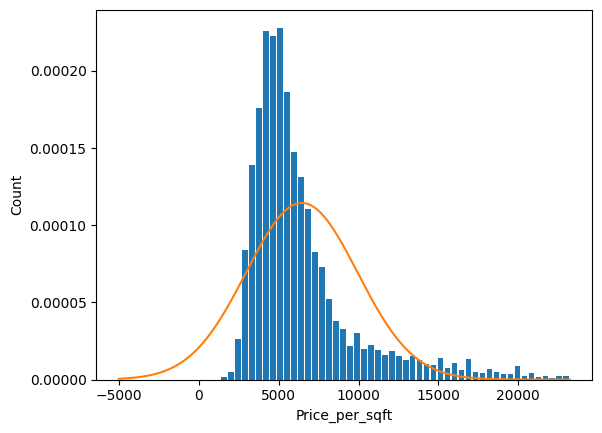

In [53]:
from scipy.stats import norm
plt.hist(df2['price_per_sqft'],bins=50,rwidth=0.8,density=True)
plt.xlabel('Price_per_sqft')
plt.ylabel('Count')

rng=np.arange(-5000,df2['price_per_sqft'].max(),0.01)
plt.plot(rng,norm.pdf(rng,df2['price_per_sqft'].mean(),df2['price_per_sqft'].std()))

{'whiskers': [<matplotlib.lines.Line2D at 0x11132000680>,
 'caps': [<matplotlib.lines.Line2D at 0x11132000b00>,
 'boxes': [<matplotlib.lines.Line2D at 0x111320003e0>],
 'medians': [<matplotlib.lines.Line2D at 0x11132001010>],
 'fliers': [<matplotlib.lines.Line2D at 0x11132001310>],
 'means': []}

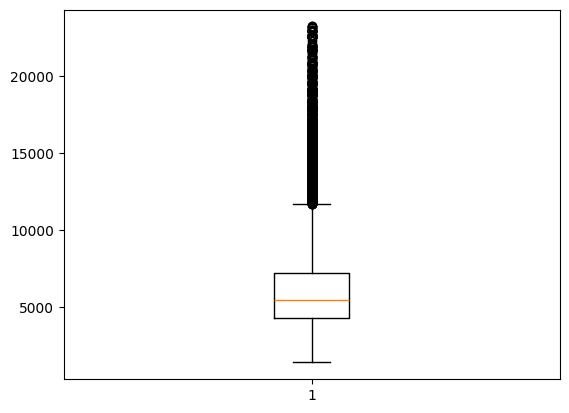

In [54]:
plt.boxplot(df2['price_per_sqft'])

In [55]:
df1['zscore']=(df1['price_per_sqft']-df1['price_per_sqft'].mean())/df1['price_per_sqft'].std()

C:\Users\kevin\AppData\Local\Temp\ipykernel_15480\2690457971.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['zscore']=(df1['price_per_sqft']-df1['price_per_sqft'].mean())/df1['price_per_sqft'].std()


In [56]:
df1

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,0.006121
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,1.073973
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.339446
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,0.903967


In [57]:
df3=df1.loc[(df1['zscore']<4)&(df1['zscore']>-4)]

In [58]:
df1.shape[0]-df3.shape[0]

125

In [59]:
# plt.boxplot(df3['price_per_sqft'])